In [1]:
include("hotrg.jl")
include("ising.jl")
include("potts.jl")
using LsqFit, Plots, Printf
using Logging
Logging.disable_logging(Logging.Warn);

## Calculation of crosscap/rainbow free energy term for the Ising model and three-state Potts model

In [2]:
χ = 16
stepnum = 7
eigvalnum = 3

3

In [3]:
_, cftdata_ising = hotrg(Ising.bulk(inv(Ising.criticaltemperature()))...; maxdim = χ, stepnum, eigvalnum)

([7.464101615137745, 0.6274149332252276, 0.660534341199761, 0.6720951812633839, 0.6743918869685999, 0.6748832941162191, 0.6751603454663432], Dict("<R|i>" => [-1.2559260603991087 -1.3645724098081917 … -1.9134665699525621 -2.0603952673300396; 2.4879494004437e-16 4.574572409433615e-16 … -7.941277442805253e-14 3.1350854298596154e-13; 2.260186519761943e-16 0.18829722573976695 … 0.0114740739546051 0.021506339469176912], "eigval" => [1.0 1.0 … 1.0 1.0; 0.6468865743941344 0.6669625123206296 … 0.6759061645309524 0.676916164382465; 0.1109881895318893 0.05022323019891157 … 0.042248685916273516 0.040894113226040876], "<C|i>" => [-1.2559260603991087 -1.2984584477641308 … -1.3052405305579289 -1.3036433032099695; 2.4879494004437e-16 4.1345965652737304e-16 … -5.2785522702787257e-14 1.9432316288892583e-13; 2.260186519761943e-16 0.5603620788650542 … 0.5421160312987238 0.543440543155696]))

In [4]:
_, cftdata_potts3 = hotrg(Potts.bulk(inv(Potts.criticaltemperature(q = 3)); q = 3)...; maxdim = χ, stepnum, eigvalnum)

([80.32704643299125, 0.4663637517883971, 0.5120685088108845, 0.5277913833097073, 0.5310868939762945, 0.5290650276068709, 0.5216078945903168], Dict("<R|i>" => [-1.4436956226295574 -1.649673538686481 … -2.536586642208738 -2.6797218397459526; 1.4710455076283324e-15 6.157493276425842e-15 … 1.2702060783311398e-12 -5.27680006332391e-12; -1.1102230246251565e-16 -9.790119709646175e-16 … -6.801087552232977e-13 -2.826711658833759e-12], "eigval" => [1.0 1.0 … 1.0 1.0; 0.6131757554856747 0.6418569291339498 … 0.6657929915981541 0.679921976269272; 0.6131757554856742 0.6418569291339492 … 0.6657929915979145 0.679921976268343], "<C|i>" => [-1.4436956226295574 -1.5238675009322147 … -1.5231773885369388 -1.5240529288738307; 1.4710455076283324e-15 6.059257651283973e-15 … 7.396704328348869e-13 -2.941071817340584e-12; -1.1102230246251565e-16 -6.374991434693676e-16 … -3.9822777615345983e-13 -1.5786186855705716e-12]))

## Plots of rainbow free energy term

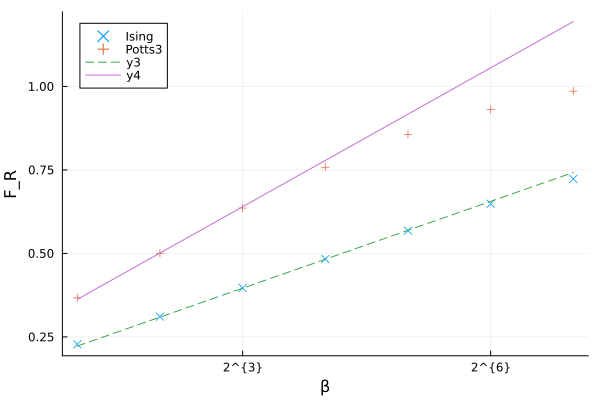

In [5]:
fr_ising = log.(abs.(cftdata_ising["<R|i>"][1, :]))
fr_potts3 = log.(abs.(cftdata_potts3["<R|i>"][1, :]))
β = 2 .^ (1:stepnum)

fitrange_ising = 1:6
fitrange_potts3 = 1:3

f_ising(x, p) = @. (Ising.centralcharge() / 4) * log(x) + p[1]
fit_ising = curve_fit(f_ising, β[fitrange_ising], fr_ising[fitrange_ising], [0.])
f_ising(x) = f_ising(x, fit_ising.param)
f_potts3(x, p) = @. (Potts.centralcharge(q = 3) / 4) * log(x) + p[1]
fit_potts3 = curve_fit(f_potts3, β[fitrange_potts3], fr_potts3[fitrange_potts3], [0.])
f_potts3(x) = f_potts3(x, fit_potts3.param)

scatter(β, fr_ising; xscale = :log2, xlabel = "β", ylabel = "F_R",
  label = "Ising", markershape = :x)
scatter!(β, fr_potts3; label = "Potts3", markershape = :+)
plot!(β, f_ising(β); line = :dash)
plot!(β, f_potts3(β); line = :dotted)

## Plots of crosscap free energy term

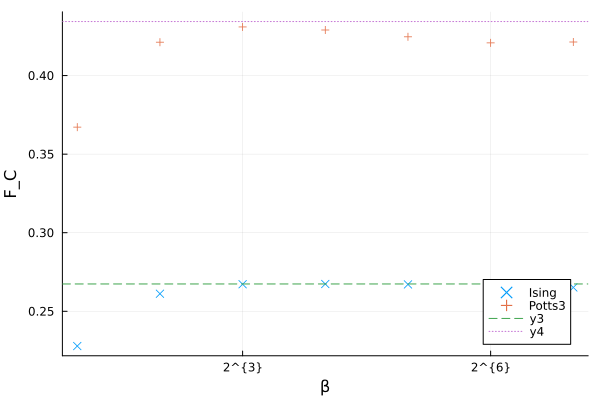

In [6]:
fc_ising = log.(abs.(cftdata_ising["<C|i>"][1, :]))
fc_potts3 = log.(abs.(cftdata_potts3["<C|i>"][1, :]))
β = 2 .^ (1:stepnum)

scatter(β, fc_ising; xscale = :log2, xlabel = "β", ylabel = "F_C",
  label = "Ising", markershape = :x)
scatter!(β, fc_potts3; label = "Potts3", markershape = :+)
hline!([log(Ising.quantumdimension()) / 2]; line = :dash)
hline!([log(Potts.quantumdimension(q = 3)) / 2]; line = :dot)